# Explanatory Data Analysis - 911 Calls from Montgomery County

In this notebook, I will do an exploratory data anslyis on dataset from [Kaggle](https://www.kaggle.com/mchirico/montcoalert).

The data set is Emergency (911) Calls in Montgomery County, PA. It has records of all the 911 calls made. Following are fields contained in the data.

* lat : Float variable, Latitude
* lng: Float variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: Float variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: Int variable, Dummy variable (always 1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('input/911.csv')

** Check the info() of the df **

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326425 entries, 0 to 326424
Data columns (total 9 columns):
lat          326425 non-null float64
lng          326425 non-null float64
desc         326425 non-null object
zip          286835 non-null float64
title        326425 non-null object
timeStamp    326425 non-null object
twp          326310 non-null object
addr         326425 non-null object
e            326425 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 22.4+ MB


** Check the head of df **

In [4]:
df.head(3)

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1

## Basic Analysis

** top 5 area with the most 911 Calls by Zip Code (zip) are: **

In [5]:
df['zip'].value_counts().head(5)

19401.0    22136
19464.0    21588
19403.0    16488
19446.0    15793
19406.0    10800
Name: zip, dtype: int64

** top 5 area with the most 911 Calls by township (twp) are: **

In [6]:
df['twp'].value_counts().head(5)

LOWER MERION    28073
ABINGTON        20206
NORRISTOWN      18433
UPPER MERION    17276
CHELTENHAM      15026
Name: twp, dtype: int64

** number of unique call titles are: **

In [7]:
df['title'].nunique()

133

## Data Wrangling

** The title column has two parts separated by ':' sign. Prior is reason of call in large category, and latter is a sort of a subcategory. Separate the title by two columns - Reasons, and SubReasons. **

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. and the SubReason column value would be BACK PAINS/ INJURY**

** The timestamp column can also be further segrated into Year Month and Day of Week.** 

In [8]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])
df['SubReason'] = df['title'].apply(lambda title: title.split(':')[1])

** Check the result **

In [9]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e Reason            SubReason  
0      REINDEER CT & DEAD END  1    EMS    BACK PAINS/INJURY  
1  BRIAR PATH & WHITEMARSH LN  1    EMS   DIABETIC EMERGENCY  
2                    HAWS AVE  1   Fire        GAS-ODOR/LEAK  
3          AIRY ST & SWEDE ST  1    EMS    CARDIAC EMERGENCY  
4    CHERRYWOOD CT & DEAD END  1    EMS            DIZZINESS

** The most common Reason for a 911 is: **

In [10]:
df['Reason'].value_counts()

EMS        161441
Traffic    116065
Fire        48919
Name: Reason, dtype: int64

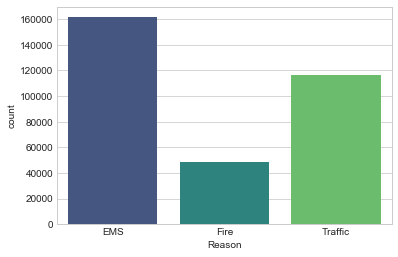

In [11]:
sns.countplot(x='Reason',data=df,palette='viridis')

** it seems like EMS is the most common reason for 911 Calls. **

** The most common SubReason among those who called 911 for EMS is: **

In [12]:
df[df['Reason']=='EMS']['SubReason'].value_counts().head()

 RESPIRATORY EMERGENCY    16602
 FALL VICTIM              16438
 CARDIAC EMERGENCY        16100
 VEHICLE ACCIDENT         12976
 SUBJECT IN PAIN           9149
Name: SubReason, dtype: int64

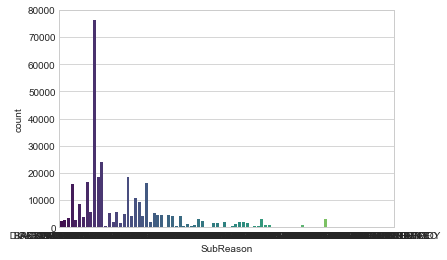

In [13]:
sns.countplot(x='SubReason',data=df,palette='viridis')

** While Respiratory Emergency is the most common SubReason among those who called 911 for EMS Reason, it seems like the most common SubReason in the dataset is not from EMS. **

** The most common SubReason in the dataset is: **

In [14]:
df['SubReason'].value_counts().head(5)

 VEHICLE ACCIDENT -       76179
 DISABLED VEHICLE -       23957
 VEHICLE ACCIDENT         18517
 FIRE ALARM               18498
 RESPIRATORY EMERGENCY    16603
Name: SubReason, dtype: int64

** Venhicle Accident is the most common common 911 Calls SubReason by far **

___
** Now let's deal with time information. Datatype of the timestamp column is: **

In [15]:
type(df['timeStamp'].iloc[0])

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

** Because the timeStamp is a string column, I'll convert it to a python DateTime object, making it easier for me to extract the year, month and day of the week information. **

In [16]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

**Extracting the year, month, and day of the week information and creating new columns **

In [17]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [18]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e Reason            SubReason  Hour  Month  \
0      REINDEER CT & DEAD END  1    EMS    BACK PAINS/INJURY    17     12   
1  BRIAR PATH & WHITEMARSH LN  1    EMS   DIABETIC EMERGENCY    17     12   
2                    HAWS AVE  1   Fire        GAS-ODOR/LEAK    14     12   
3          AIRY ST & SWEDE ST  1    EMS    CARDIAC EMERGENCY    16     12   
4    CHERRYWOOD CT & DEAD END  1    EMS            DIZZINESS    16     12   

  Day of Week  
0         Thu  
1         Thu  
2         Thu  
3         Thu  
4         Thu

** Checking out the most common call reason based on the day of the week **

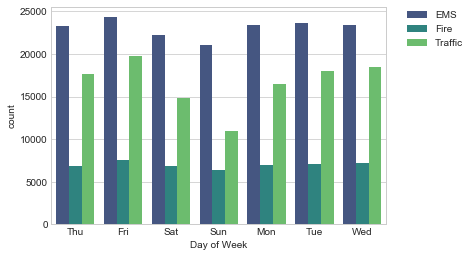

In [19]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

** It is somewhat interesting that Traffic related 911 Calls reduce noticably during the weekend. **

** Now do the same for Month:**

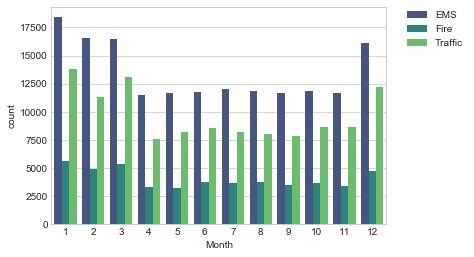

In [20]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

** Checking Relationship between the number of 911 Calls and the Month**

Text(0,0.5,'Number of Calls')

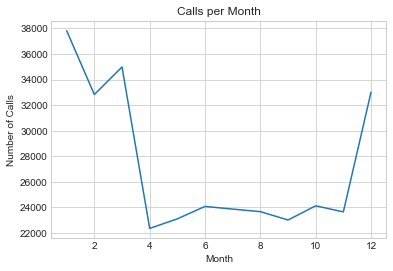

In [21]:
byMonth = df.groupby('Month').count()
byMonth['Reason'].plot()
plt.title('Calls per Month')
plt.ylabel('Number of Calls')

** We can see 911 Calls skyrockets during December to March. Likely because during winter, there are more vehicle accidents. **

Text(0,0.5,'Number of Calls')

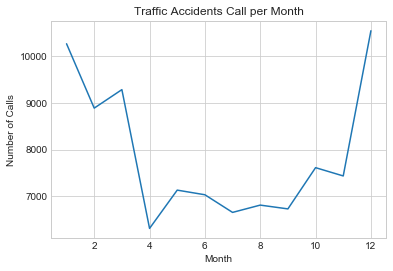

In [22]:
df.loc[df['SubReason'].str.contains('VEHICLE ACCIDENT')].groupby('Month')['SubReason'].count().plot()
plt.title('Traffic Accidents Call per Month')
plt.ylabel('Number of Calls')

** As suspected, traffic accidents during winters is very high. **

** Now, let's fit the number of calls to months, and see if we can find concrete relationship between the two. **

Text(0.5,1,'Number of 911 Calls vs. Month')

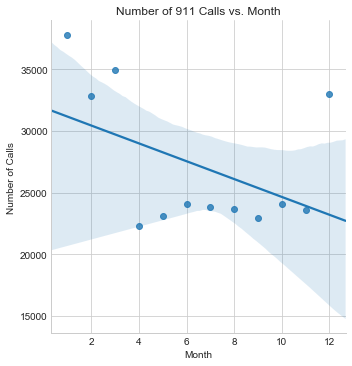

In [23]:
sns.lmplot(x='Month',y='twp',data = byMonth.reset_index())
plt.ylabel('Number of Calls')
plt.title('Number of 911 Calls vs. Month')

** It seems like it's hard to fit a linear regression model to this data **

** I'm going to extract the date from the timestamp and see behaivor in a little more detail. **

In [24]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

** Grouping and plotting data **

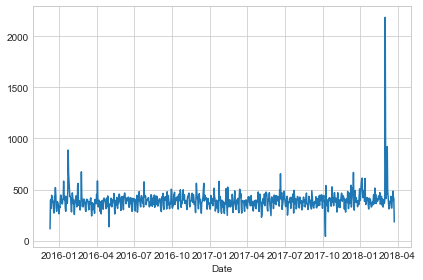

In [25]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

** We can notice there is an exceptionally high 911 Call counts in on of the month. Let's further investigate. **

In [26]:
df.groupby('Date').count()['twp'].idxmax()

datetime.date(2018, 3, 2)

In [27]:
marchfirst = pd.to_datetime('2018-03-01').date()
marchsecond = pd.to_datetime('2018-03-02').date()
marchten= pd.to_datetime('2018-03-10').date()

marchseconddf = df.loc[df['Date'] == marchsecond]
df.loc[df['Date'] == marchsecond]['Reason'].count()

2187

** For some reason, there are over 2000 Calls made in 2018 March 2nd. **

** Let's further investigate the reason. **

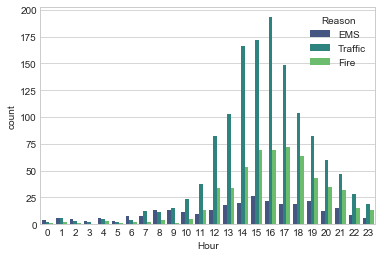

In [28]:
sns.countplot(x='Hour',data=marchseconddf, hue='Reason', palette='viridis')

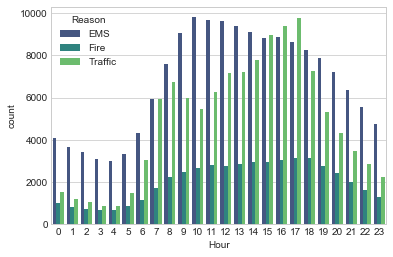

In [29]:
sns.countplot(x='Hour',data=df, hue='Reason', palette='viridis')

** We can tell from the two graphs above, that March 2nd is abnomaly in a sense that, not only there were over 2,000 Calls made, but also it differs greatly from average Hour vs Call Count chart. **

** 911 Calls could have come from specific region within Montegomory County. So I will further investigate by looking at where calls were made using Folium Scatter Plot. **

In [30]:
import folium

In [31]:
# random sample of 20% to save load time. 
rnd_sample = marchseconddf.sample(frac = 0.2)

COORDINATES = (rnd_sample['lat'].mean(), rnd_sample['lng'].mean())

# create map zoomed in on Montegomery County
map = folium.Map(location=COORDINATES, zoom_start=11)

def plotDotTraffic(point):
    folium.Marker(location=[float(point.lat), float(point.lng)],
                  icon=folium.Icon(color='blue'),
                  popup = point.Reason).add_to(map)
def plotDotEMS(point):
    folium.Marker(location=[float(point.lat), float(point.lng)],
                  icon=folium.Icon(color='green'),
                  popup = point.Reason).add_to(map)
def plotDotFire(point):
    folium.Marker(location=[float(point.lat), float(point.lng)],
                  icon=folium.Icon(color='red'),
                  popup = point.Reason).add_to(map)
    
rnd_sample[rnd_sample['Reason']=='Traffic'].apply(plotDotTraffic, axis=1)
rnd_sample[rnd_sample['Reason']=='EMS'].apply(plotDotEMS, axis=1)
rnd_sample[rnd_sample['Reason']=='Fire'].apply(plotDotFire, axis=1)

map

** From the above map, we can tell that this abnomaly weren't focused on specific location, but spread out through Montegomory County. **

** After looking into what could've actually happened in Montegomory County on March 2nd, 2018, I've came across an article. **

[Major Storm Kills 1, Creates Travel Chaos Across Region With Blizzard Conditions and Dangerous Winds](https://www.nbcphiladelphia.com/weather/Heavy-Rain-Wind-Flooding-Possible-Snow-First-Alert-Pennsylvania-Delaware-New-Jersey-Philadelphia-475463003.html)

** Apparently, there was a major storm that knocked out power to more than 522,000 customers across Southeastern Pennsylvania, New Jersy and Delaware. Also it was written in the article it could take days before eletricity comes back. **

** This would explains abnormally high 911 Calls occured on March 2nd. ** 


    

____
** Now I wanted to see how the counts of calls on each hour changes during a given day of the week using heatmap **

In [32]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour           0     1    2    3    4    5     6     7     8     9   ...   \
Day of Week                                                          ...    
Fri           896   789  701  644  633  786  1286  2087  2487  2570  ...    
Mon           931   732  663  585  683  862  1291  2175  2714  2766  ...    
Sat          1130   999  908  767  742  788   957  1295  1674  2132  ...    
Sun          1159  1026  955  800  717  736   880  1196  1492  1849  ...    
Thu           871   690  727  603  573  833  1386  2254  2613  2719  ...    

Hour           14    15    16    17    18    19    20    21    22    23  
Day of Week                                                              
Fri          3290  3562  3726  3596  2858  2562  2205  1916  1765  1396  
Mon          2729  3034  3082  3116  2729  2179  1912  1503  1303  1003  
Sat          2643  2563  2529  2525  2477  2320  2074  1839  1579  1469  
Sun          2276  2170  2200  2234  2179  2067  1753  1536  1235  1177  
Thu          2863  3044  3017  3335  2707  2226  1974  1724  1360  1120  

[5 rows x 24 columns]

** Now create a HeatMap using this new DataFrame. **

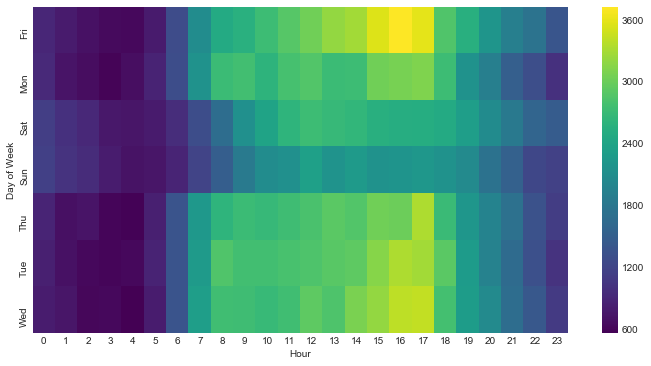

In [33]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

** Without surprise, most of the 911 calls are made during the day, between 8:00AM and 6:00PM **

** Now create a clustermap using this DataFrame. **

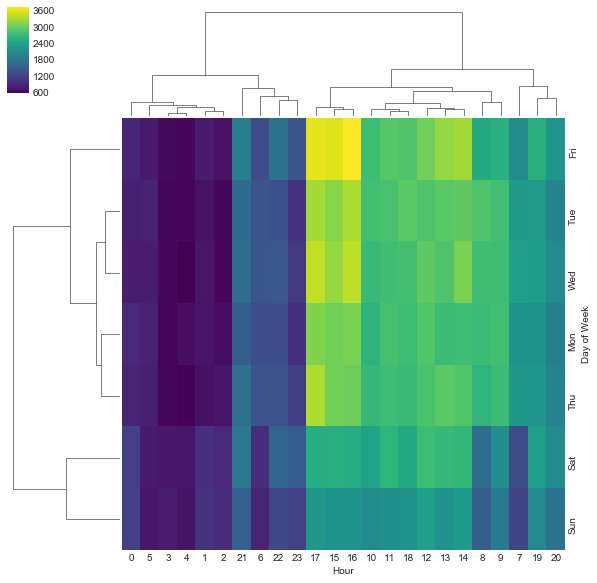

In [34]:
sns.clustermap(dayHour,cmap='viridis')

** And with this, I will conclude my explanatory analysis on 911 Calls from Montegomory County from 2016 to 2018. **